In [62]:
# Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

# EDA (Analisis exploratorio de datos)

## Historico velocidad internet

In [100]:
internet_acceso_por_velocidad = pd.read_csv("historico_velocidad_internet.csv")
internet_acceso_por_velocidad

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.000
1,2022,4,Capital Federal,18.286
2,2022,4,Catamarca,8.333
3,2022,4,Chaco,10.402
4,2022,4,Chubut,1.592
...,...,...,...,...
859,2014,1,Santa Cruz,332.000
860,2014,1,Santa Fe,315.000
861,2014,1,Santiago Del Estero,295.000
862,2014,1,Tierra Del Fuego,345.000


In [64]:
internet_acceso_por_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


### kpi 2 : Objetivo es mantener por arriba de 4% Mbps por provincia

In [65]:
# Obtenemos el total de Mbps
Total = internet_acceso_por_velocidad["Mbps (Media de bajada)"].sum()


In [66]:
# Pasamos a tipo numerico
internet_acceso_por_velocidad["Mbps (Media de bajada)"] = pd.to_numeric(internet_acceso_por_velocidad["Mbps (Media de bajada)"], errors='coerce')
# Obtenemos el porcentaje de Mbps por cada provincia
kpi_por_provincia1 = internet_acceso_por_velocidad.groupby("Provincia")["Mbps (Media de bajada)"].sum() / Total * 100




In [67]:
# Hacemos un dataframe con los porcentajes establecidos
kpi_por_provincia_df1 = round(kpi_por_provincia1.reset_index(name="Porcentaje_KPI"),2)


In [68]:
# Cantidad de provincias que cumplen con el objetivo
print("Provincias que cumplen con el kpi propuesto:")
kpi_por_provincia_df1[kpi_por_provincia_df1["Porcentaje_KPI"]>= 4]

Provincias que cumplen con el kpi propuesto:


,Provincia,Porcentaje_KPI
2,Catamarca,4.85
4,Chubut,6.34
8,Formosa,4.03
10,La Pampa,4.43
11,La Rioja,5.19
12,Mendoza,4.79
16,Salta,4.00
17,San Juan,5.78
19,Santa Cruz,6.09
21,Santiago Del Estero,4.89


Las provincias que no alcanzan los objetivos establecidos para la velocidad de Internet deben embarcarse en un proceso de mejora. Esto implica realizar una inversión decidida en tecnologías avanzadas(ej: Fibra Optica). Esta inversión permitirá un aumento sustancial en la velocidad de Internet, Además de la inversión en tecnología, es necesario mejorar la infraestructura de telecomunicaciones.

In [69]:
# Por ultimo cambiamos los "." por las "," para cuando exportemos el archivo en power bi no tengamos problemas con el tipo de dato
internet_acceso_por_velocidad["Mbps (Media de bajada)"] = internet_acceso_por_velocidad["Mbps (Media de bajada)"].astype(str).str.replace(".", ",")

In [70]:
# Exportamos archivo
internet_acceso_por_velocidad.to_csv("internet_acceso_por_velocidad.csv")

## Internet Penetracion

In [101]:
# Importamos archivo
Internet_penetracion = pd.read_csv("Internet_Penetracion (1).csv")



In [72]:
# Observamo tipo de dato y existencia de nulos
Internet_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    object 
 4   Unnamed: 4                    0 non-null      float64
 5   Unnamed: 5                    0 non-null      float64
 6   Unnamed: 6                    0 non-null      float64
dtypes: float64(3), int64(2), object(2)
memory usage: 47.4+ KB


In [73]:
# Borramos columnas que no son necesaria
Internet_penetracion = Internet_penetracion.drop(columns=["Unnamed: 4","Unnamed: 5","Unnamed: 6"])


In [74]:
# Pasamos a float la columna "Accesos por cada 100 hogares" 
Internet_penetracion["Accesos por cada 100 hogares"] = pd.to_numeric(Internet_penetracion["Accesos por cada 100 hogares"].str.replace(",","."))
# Pasamos a fecha la columna Año
Internet_penetracion["Año"] = pd.to_datetime(Internet_penetracion["Año"], format='%Y')

In [75]:
# Ordenamos por cada provincia , año y trimestre
df_ordenado = Internet_penetracion.sort_values(by=["Provincia","Año","Trimestre"])
df_ordenado.head(12)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
840,2014-01-01,1,Buenos Aires,54.57
816,2014-01-01,2,Buenos Aires,55.06
792,2014-01-01,3,Buenos Aires,56.75
768,2014-01-01,4,Buenos Aires,56.09
744,2015-01-01,1,Buenos Aires,56.37
720,2015-01-01,2,Buenos Aires,56.80
696,2015-01-01,3,Buenos Aires,57.69
672,2015-01-01,4,Buenos Aires,58.29
648,2016-01-01,1,Buenos Aires,57.34
624,2016-01-01,2,Buenos Aires,59.34


kpi 2 : Objetivo aumentar un 2% el acceso al servicio de internet para el próximo trimestre por cada 100 hogares

In [76]:
# Agregamos columna con el numero de accesos posterior al trimestre
df_ordenado.loc[:, 'Accesos por cada 100 hogares posterior'] = df_ordenado['Accesos por cada 100 hogares'].shift(-1)

# Agregamos columna con la variacion trimestral del acceso actual con el acceso posterior
df_ordenado.loc[:,"Variacion Trimestral"] = round((df_ordenado['Accesos por cada 100 hogares posterior'] - df_ordenado['Accesos por cada 100 hogares']) / df_ordenado['Accesos por cada 100 hogares']*100,2)
df_ordenado

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hogares posterior,Variacion Trimestral
840,2014-01-01,1,Buenos Aires,54.57,55.06,0.90
816,2014-01-01,2,Buenos Aires,55.06,56.75,3.07
792,2014-01-01,3,Buenos Aires,56.75,56.09,-1.16
768,2014-01-01,4,Buenos Aires,56.09,56.37,0.50
744,2015-01-01,1,Buenos Aires,56.37,56.80,0.76
...,...,...,...,...,...,...
119,2021-01-01,4,Tucumán,55.93,57.39,2.61
95,2022-01-01,1,Tucumán,57.39,59.31,3.35
71,2022-01-01,2,Tucumán,59.31,61.14,3.09
47,2022-01-01,3,Tucumán,61.14,61.04,-0.16


In [77]:
# Trimestres que no cumplen con el objetivo
df_ordenado[df_ordenado["Variacion Trimestral"]< 2]

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hogares posterior,Variacion Trimestral
840,2014-01-01,1,Buenos Aires,54.57,55.06,0.90
792,2014-01-01,3,Buenos Aires,56.75,56.09,-1.16
768,2014-01-01,4,Buenos Aires,56.09,56.37,0.50
744,2015-01-01,1,Buenos Aires,56.37,56.80,0.76
720,2015-01-01,2,Buenos Aires,56.80,57.69,1.57
...,...,...,...,...,...,...
311,2019-01-01,4,Tucumán,47.65,47.85,0.42
215,2020-01-01,4,Tucumán,54.78,54.82,0.07
191,2021-01-01,1,Tucumán,54.82,54.93,0.20
167,2021-01-01,2,Tucumán,54.93,54.64,-0.53


De las 864 columnas que existen en el dataframe, 600 registros no cumplieron con el objetivo

In [78]:
# Cambiamos los "." por las "," para cuando exportemos el archivo en power bi no tengamos problemas con el tipo de dato

df_ordenado["Variacion Trimestral"] = df_ordenado["Variacion Trimestral"].astype(str).str.replace(".", ",")
df_ordenado["Accesos por cada 100 hogares"] = df_ordenado["Accesos por cada 100 hogares"].astype(str).str.replace(".", ",")
df_ordenado["Accesos por cada 100 hogares posterior"] = df_ordenado["Accesos por cada 100 hogares posterior"].astype(str).str.replace(".", ",")

In [79]:
# Exportamos archivo limpio
df_ordenado.to_csv("Internet_penetracion.csv")

## Internet Accesos por tecnologia y provincia

In [102]:
# Importamos archivo
df = pd.read_csv("Internet_Accesos-por-tecnologia._y_provincia.csv")

In [81]:
# Observamos tipo de datos y existencia de nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           865 non-null    object 
 1   Trimestre     865 non-null    object 
 2   Provincia     864 non-null    object 
 3   ADSL          864 non-null    float64
 4   Cablemodem    864 non-null    float64
 5   Fibra óptica  864 non-null    float64
 6   Wireless      864 non-null    float64
 7   Otros         864 non-null    float64
 8   Total         864 non-null    float64
dtypes: float64(6), object(3)
memory usage: 60.9+ KB


In [82]:
# Valores unicos
df["Año"].unique()

array(['2022', '2021', '2020', '2019', '2019 *', '2018', '2017', '2016',
       '2015', '2014', '*'], dtype=object)

In [83]:
# Corregimos errores 
df.loc[df['Año'] == '2019 *', 'Año'] = '2019'


In [84]:
# Valores unicos
df["Trimestre"].unique()

array(['4', '3', '2', '1', '3 *', '2 *', '1 *',
       'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.'],
      dtype=object)

In [85]:
# Corregimos errores 
df.loc[df['Trimestre'] == '3 *', 'Trimestre'] = '3'
df.loc[df['Trimestre'] == '2 *', 'Trimestre'] = '2'
df.loc[df['Trimestre'] == '1 *', 'Trimestre'] = '1'

In [86]:
df.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,86.363426,103.291667,165.432870,57.777778,102.712963,137.636574
std,116.431490,188.849172,266.807807,156.015038,207.418981,180.798813
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,21.000000,9.000000,9.000000,4.000000,3.000000,39.750000
50%,46.000000,35.500000,25.000000,10.000000,15.000000,91.000000
75%,81.000000,72.250000,170.750000,26.000000,47.000000,143.250000
max,720.000000,999.000000,998.000000,952.000000,987.000000,987.000000


Existen ceros en las tecnologias Cablemodem, Fibra Optica y Wireless, podria ser que en algunas provincias no tenian estas tecnologias o no llegaban

In [87]:
# Correjimos la columna total, sumamos cada tecnologia
df["Total"] = df["ADSL"] + df["Cablemodem"] + df["Fibra óptica"] + df["Wireless"]

 Outliers

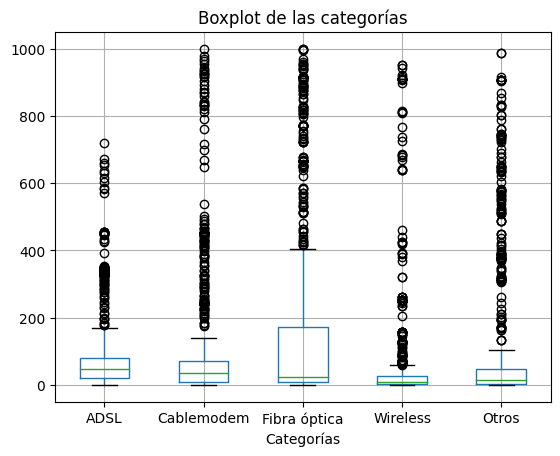

In [88]:
# Observamos a simple vista si existen outliers creando un grafico boxplot para cada tecnlogia
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

df[columnas].boxplot()
plt.xlabel('Categorías')
plt.title('Boxplot de las categorías')
plt.show()

Calculamos la cantidad de outliers que existen para cada tecnlogia

ADSL

In [89]:
# Calculamos el intercuartílico de la tecnlogia "ADSL"
Q1 = df["ADSL"].quantile(0.25)
Q3 = df["ADSL"].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites para los outliers
Limite_inferior = Q1 - 1.5 * IQR
Limite_superior = Q3 + 1.5 * IQR

# Observamos si existe outliers
df_con_outliers = df.loc[(df['ADSL'] < Limite_inferior) | (df['ADSL'] > Limite_superior)]
outliers = df_con_outliers["ADSL"].count()
print(f"Tenemos {outliers} outliers para la tecnlogia ADSL")
df_con_outliers

Tenemos 108 outliers para la tecnlogia ADSL


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,460.0
24,2022,3,Buenos Aires,340.0,3.0,1.0,127.0,70.0,471.0
44,2022,3,Santa Fe,184.0,426.0,215.0,43.0,20.0,868.0
48,2022,2,Buenos Aires,351.0,3.0,1.0,127.0,71.0,482.0
53,2022,2,Córdoba,179.0,468.0,309.0,61.0,10.0,1017.0
...,...,...,...,...,...,...,...,...,...
821,2014,2,Córdoba,338.0,235.0,351.0,4.0,374.0,928.0
836,2014,2,Santa Fe,324.0,178.0,3.0,6.0,636.0,511.0
841,2014,1,Capital Federal,446.0,820.0,18.0,2.0,15.0,1286.0
845,2014,1,Córdoba,337.0,226.0,347.0,4.0,368.0,914.0


Cablemodem

In [90]:
# Calculamos el intercuartílico de la tecnlogia "Cablemodem"
Q1 = df["Cablemodem"].quantile(0.25)
Q3 = df["Cablemodem"].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites para los outliers
Limite_inferior = Q1 - 1.5 * IQR
Limite_superior = Q3 + 1.5 * IQR

# Observamos si existe outliers
df_con_outliers = df.loc[(df['Cablemodem'] < Limite_inferior) | (df['Cablemodem'] > Limite_superior)]
outliers = df_con_outliers["Cablemodem"].count()
print(f"Tenemos {outliers} outliers para la tecnlogia cablemodem")
df_con_outliers

Tenemos 140 outliers para la tecnlogia cablemodem


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
5,2022,4,Córdoba,152.0,457.0,367.0,62.0,11.0,1038.0
20,2022,4,Santa Fe,164.0,412.0,249.0,44.0,19.0,869.0
29,2022,3,Córdoba,164.0,465.0,339.0,61.0,10.0,1029.0
44,2022,3,Santa Fe,184.0,426.0,215.0,43.0,20.0,868.0
53,2022,2,Córdoba,179.0,468.0,309.0,61.0,10.0,1017.0
...,...,...,...,...,...,...,...,...,...
844,2014,1,Chubut,51.0,539.0,866.0,11.0,7.0,1467.0
845,2014,1,Córdoba,337.0,226.0,347.0,4.0,368.0,914.0
857,2014,1,San Juan,48.0,434.0,722.0,808.0,1.0,2012.0
858,2014,1,San Luis,11.0,428.0,354.0,21.0,448.0,814.0


Fibra óptica

In [91]:
# Calculamos el intercuartílico de la tecnlogia Fibra óptica
Q1 = df["Fibra óptica"].quantile(0.25)
Q3 = df["Fibra óptica"].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites para los outliers
Limite_inferior = Q1 - 1.5 * IQR
Limite_superior = Q3 + 1.5 * IQR

# Observamos si existe outliers
df_con_outliers = df.loc[(df['Fibra óptica'] < Limite_inferior) | (df['Fibra óptica'] > Limite_superior)]
outliers = df_con_outliers["Fibra óptica"].count()
print(f"Tenemos {outliers} outliers para la tecnlogia Fibra óptica")
df_con_outliers


Tenemos 130 outliers para la tecnlogia Fibra óptica


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
94,2022,1,Tierra Del Fuego,13.0,39.0,416.0,124.0,340.0,592.0
118,2021,4,Tierra Del Fuego,13.0,38.0,426.0,124.0,342.0,601.0
120,2021,3,Buenos Aires,586.0,3.0,886.0,120.0,65.0,1595.0
141,2021,3,Santiago Del Estero,20.0,86.0,909.0,6.0,3.0,1021.0
144,2021,2,Buenos Aires,603.0,3.0,854.0,114.0,58.0,1574.0
...,...,...,...,...,...,...,...,...,...
850,2014,1,La Pampa,16.0,31.0,513.0,6.0,701.0,566.0
854,2014,1,Neuquén,48.0,28.0,997.0,10.0,3.0,1083.0
855,2014,1,Río Negro,65.0,24.0,876.0,4.0,2.0,969.0
857,2014,1,San Juan,48.0,434.0,722.0,808.0,1.0,2012.0


Wireless

In [92]:
# Calculamos el intercuartílico de la tecnlogia Wireless
Q1 = df["Wireless"].quantile(0.25)
Q3 = df["Wireless"].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites para los outliers
Limite_inferior = Q1 - 1.5 * IQR
Limite_superior = Q3 + 1.5 * IQR

# Observamos si existe outliers
df_con_outliers = df.loc[(df['Wireless'] < Limite_inferior) | (df['Wireless'] > Limite_superior)]
outliers = df_con_outliers["Wireless"].count()
print(f"Tenemos {outliers} outliers para la tecnlogia Wireless")
df_con_outliers

Tenemos 134 outliers para la tecnlogia Wireless


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,460.0
5,2022,4,Córdoba,152.0,457.0,367.0,62.0,11.0,1038.0
18,2022,4,San Luis,6.0,43.0,3.0,82.0,511.0,134.0
22,2022,4,Tierra Del Fuego,13.0,41.0,405.0,157.0,651.0,616.0
24,2022,3,Buenos Aires,340.0,3.0,1.0,127.0,70.0,471.0
...,...,...,...,...,...,...,...,...,...
829,2014,2,Misiones,57.0,18.0,4.0,150.0,8.0,229.0
837,2014,2,Santiago Del Estero,33.0,4.0,19.0,907.0,34.0,963.0
853,2014,1,Misiones,57.0,17.0,4.0,150.0,8.0,228.0
857,2014,1,San Juan,48.0,434.0,722.0,808.0,1.0,2012.0


Otros

In [93]:
# Calculamos el intercuartílico de la tecnologia Otros
Q1 = df["Otros"].quantile(0.25)
Q3 = df["Otros"].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites para los outliers
Limite_inferior = Q1 - 1.5 * IQR
Limite_superior = Q3 + 1.5 * IQR

# Observamos si existe outliers
df_con_outliers = df.loc[(df['Otros'] < Limite_inferior) | (df['Otros'] > Limite_superior)]
outliers = df_con_outliers["Otros"].count()
print(f"Tenemos {outliers} outliers para la tecnlogia Otros")
df_con_outliers

Tenemos 150 outliers para la tecnlogia Otros


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
8,2022,4,Formosa,14.0,17.0,13.0,18.0,227.0,62.0
18,2022,4,San Luis,6.0,43.0,3.0,82.0,511.0,134.0
19,2022,4,Santa Cruz,10.0,24.0,12.0,4.0,662.0,50.0
22,2022,4,Tierra Del Fuego,13.0,41.0,405.0,157.0,651.0,616.0
23,2022,4,Tucumán,69.0,21.0,169.0,4.0,527.0,263.0
...,...,...,...,...,...,...,...,...,...
847,2014,1,Entre Ríos,108.0,21.0,49.0,5.0,133.0,183.0
850,2014,1,La Pampa,16.0,31.0,513.0,6.0,701.0,566.0
856,2014,1,Salta,73.0,18.0,45.0,8.0,568.0,144.0
858,2014,1,San Luis,11.0,428.0,354.0,21.0,448.0,814.0


Analizar la provincia que más consume el servicio de internet.

In [94]:
# Sumamos el total de las tecnlogias agrupando por Año y Provincia
df_agrupado_provincia = df.groupby(["Año","Provincia"])["Total"].sum().reset_index()

# Provincia que mas consumio internet 
provincia_mas_consumo = df_agrupado_provincia.loc[df_agrupado_provincia['Total'].idxmax(), 'Provincia']
# Provincia que menos consumio internet 
provincia_menos_consumo = df_agrupado_provincia.loc[df_agrupado_provincia['Total'].idxmin(), 'Provincia']
print(f"Provincia con mas consumo de internet, {provincia_mas_consumo}")
print(f"Provincia con menos consumo de internet, {provincia_menos_consumo}")

Provincia con mas consumo de internet, Chubut
Provincia con menos consumo de internet, Formosa


Determinar por provincia, cúal es el acceso mayor y el menor servicio de acceso a internet contratado.

In [95]:
# Borramos la columna trimestre
df_grouped =  df.drop(columns="Trimestre")
# Agrupamos por provincia y año
df_grouped = df_grouped.groupby(['Año', 'Provincia']).sum().reset_index()

# Agregamos la tecnologia que mas consumio internet en cada provincia
df_grouped['Maximo'] = df_grouped[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']].max(axis=1)
# Agregamos la tecnologia que menos consumio internet en cada provincia
df_grouped['Minimo'] = df_grouped[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']].min(axis=1)
df_grouped.head(6)

,Año,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Maximo,Minimo
0,2014,Buenos Aires,8.0,4.0,486.0,72.0,131.0,570.0,486.0,4.0
1,2014,Capital Federal,1800.0,3321.0,71.0,8.0,59.0,5200.0,3321.0,8.0
2,2014,Catamarca,97.0,774.0,65.0,0.0,177.0,936.0,774.0,0.0
3,2014,Chaco,214.0,40.0,120.0,1.0,237.0,375.0,214.0,1.0
4,2014,Chubut,200.0,2553.0,3505.0,46.0,27.0,6304.0,3505.0,46.0
5,2014,Corrientes,214.0,36.0,133.0,4.0,250.0,387.0,214.0,4.0


Agregamos la columna la tecnologia que mas se uso y la que menos se uso en cada provincia 

In [96]:
columnas = ["ADSL","Cablemodem","Fibra óptica","Wireless"]
# Tecnologia que mas se uso en cada provincia
df_grouped["Tecnlogia_Mayor"] = df_grouped[columnas].idxmax(axis=1)
# Tecnologia que menos se uso en cada provincia
df_grouped["Tecnlogia_Menor"] = df_grouped[columnas].idxmin(axis=1)
# Observamos las tecnologias que no estaban en las provincias
df_grouped[df_grouped["Minimo"] == 0][["Año","Provincia","Tecnlogia_Menor"]]
df_grouped

,Año,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Maximo,Minimo,Tecnlogia_Mayor,Tecnlogia_Menor
0,2014,Buenos Aires,8.0,4.0,486.0,72.0,131.0,570.0,486.0,4.0,Fibra óptica,Cablemodem
1,2014,Capital Federal,1800.0,3321.0,71.0,8.0,59.0,5200.0,3321.0,8.0,Cablemodem,Wireless
2,2014,Catamarca,97.0,774.0,65.0,0.0,177.0,936.0,774.0,0.0,Cablemodem,Wireless
3,2014,Chaco,214.0,40.0,120.0,1.0,237.0,375.0,214.0,1.0,ADSL,Wireless
4,2014,Chubut,200.0,2553.0,3505.0,46.0,27.0,6304.0,3505.0,46.0,Fibra óptica,Wireless
...,...,...,...,...,...,...,...,...,...,...,...,...
211,2022,Santa Cruz,41.0,95.0,45.0,16.0,2228.0,197.0,95.0,16.0,Cablemodem,Wireless
212,2022,Santa Fe,759.0,1711.0,801.0,175.0,80.0,3446.0,1711.0,175.0,Cablemodem,Wireless
213,2022,Santiago Del Estero,64.0,330.0,41.0,27.0,12.0,462.0,330.0,27.0,Cablemodem,Wireless
214,2022,Tierra Del Fuego,52.0,160.0,1627.0,531.0,2293.0,2370.0,1627.0,52.0,Fibra óptica,ADSL


Hasta el 2020 algunas provincias no tenian las tecnologias Wireless y Cablemodem, luego de ese año todas las provincias contaban con todas las tecnologias.

Grafico de barras

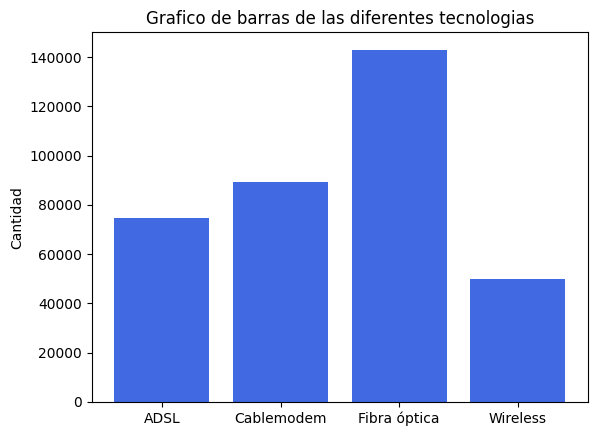

In [97]:
# Creamos una lista
Lista= [df["ADSL"].sum() , df["Cablemodem"].sum(),df["Fibra óptica"].sum(),df["Wireless"].sum()]

# Crear un Grafico de barras
plt.bar(columnas, Lista, color='royalblue')
plt.title('Grafico de barras de las diferentes tecnologias')
plt.ylabel('Cantidad')
plt.show()

Grafico circular

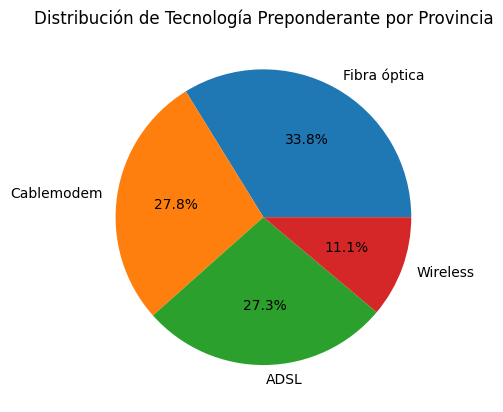

In [98]:
## Se obtiene las tecnologías únicas y contar su frecuencia
tecnologias = df_grouped["Tecnlogia_Mayor"].unique()
frecuencias = df_grouped['Tecnlogia_Mayor'].value_counts()

# se configura el gráfico de torta
fig, ax = plt.subplots()
ax.pie(frecuencias, labels=tecnologias, autopct='%1.1f%%')

ax.set_title('Distribución de Tecnología Preponderante por Provincia')

plt.show()

En las provincias, la tecnología más utilizada es la fibra óptica, lo que hay que destacar su eficacia y calidad.

In [99]:
df_grouped.to_csv("Internet_accesos_tecnologia_provincia.csv")